# Daubechies Wavelet

Daubechies wavelet transform, named after the Belgian mathematician Ingrid Daubechies, is a type of wavelet transform commonly used in signal and image processing. It belongs to a family of wavelets known as orthogonal wavelets or compactly supported wavelets.

Wavelet transforms decompose signals or images into a set of basis functions called wavelets, which are localized in both time and frequency domains. The Daubechies wavelet transform is particularly useful for analyzing and representing signals with sharp transitions or discontinuities.

The Daubechies wavelet transform operates by applying a series of high-pass and low-pass filters to the input signal or image. These filters are designed to extract different frequency components of the signal or image. The output of the transform is a set of coefficients representing the contributions of different wavelets at different scales.

In [6]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math
import IPython.display
from PIL import Image

In [7]:
def imshow(image, width=None):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret, width=width)
    IPython.display.display(i)

In [8]:
def jpg_to_pgm(jpg_path, pgm_path):
    # Abre la imagen JPG
    image = Image.open(jpg_path)

    # Convierte la imagen a escala de grises
    image_gray = image.convert('L')

    # Guarda la imagen en formato PGM
    image_gray.save(pgm_path)

def interpret_pgm(pgm_path):
    # Abre la imagen PGM
    image = Image.open(pgm_path)

    # Obtiene la información de la imagen
    width, height = image.size
    max_gray_value = image.getextrema()[1]

    # Accede a los píxeles de la imagen
    pixels = list(image.getdata())
    # Haces algo con los píxeles...
    # Por ejemplo, puedes imprimir los valores de los primeros 10 píxeles
    return pixels

    # Puedes realizar cualquier otra operación que necesites con los píxeles

# Ruta del archivo JPG
jpg_file = '/home/juanca632/PersonalProjects/stage/wavelet-transform/image_color.jpg'

# Ruta del archivo PGM de salida
pgm_file = 'imagen.pgm'

# Transformar JPG a PGM
jpg_to_pgm(jpg_file, pgm_file)

# Interpretar el archivo PGM
pixels = interpret_pgm(pgm_file)


In [9]:
pixels = np.array(pixels)
pixels = pixels.reshape((512, 512))

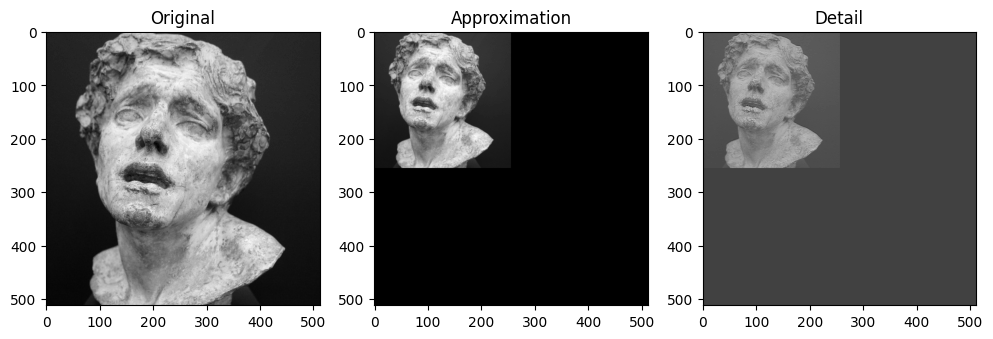

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def daubechies4_wavelet_transform(signal):
    n = len(signal)
    
    # Coefficients for the Daubechies 4 filter
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))
    
    # Initialize arrays for approximation and detail coefficients
    approx_coeffs = np.zeros(n)
    detail_coeffs = np.zeros(n)
    
    # Downsample the signal and compute coefficients
    for i in range(0, n, 2):
        approx_coeffs[i // 2] = h0 * signal[i] + h1 * signal[(i + 1) % n]
        detail_coeffs[i // 2] = h2 * signal[i] + h3 * signal[(i + 1) % n]
    
    return approx_coeffs, detail_coeffs

def daubechies4_wavelet_transform_2D(image):
    rows, cols = image.shape
    
    # Coefficients for the Daubechies 4 filter
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))
    
    # Initialize arrays for approximation and detail coefficients
    approx_coeffs = np.zeros((rows, cols))
    detail_coeffs = np.zeros((rows, cols))
    
    # Apply the wavelet transform row-wise
    for i in range(rows):
        row = image[i, :]
        approx_coeffs[i, :], detail_coeffs[i, :] = daubechies4_wavelet_transform(row)
    
    # Apply the wavelet transform column-wise
    for j in range(cols):
        col = approx_coeffs[:, j]
        approx_coeffs[:, j], detail_coeffs[:, j] = daubechies4_wavelet_transform(col)
    
    return approx_coeffs, detail_coeffs


# Normalize the image to the range [0, 1]
# image_normalized = pixels.astype(float) / 255.0
# print(image_normalized)

# Apply the wavelet transform
approximation_coeffs, detail_coeffs = daubechies4_wavelet_transform_2D(pixels)

# Plot the approximation and detail images
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(pixels, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(approximation_coeffs, cmap='gray')
axs[1].set_title('Approximation')
axs[2].imshow(detail_coeffs, cmap='gray')
axs[2].set_title('Detail')

plt.show()


[[ 0.48296291  0.8365163   0.22414387 ...  0.          0.
   0.        ]
 [ 0.          0.          0.48296291 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.48296291  0.
   0.        ]
 [ 0.          0.          0.         ... -0.22414387  0.8365163
  -0.48296291]
 [ 0.8365163  -0.48296291  0.         ...  0.         -0.12940952
  -0.22414387]]


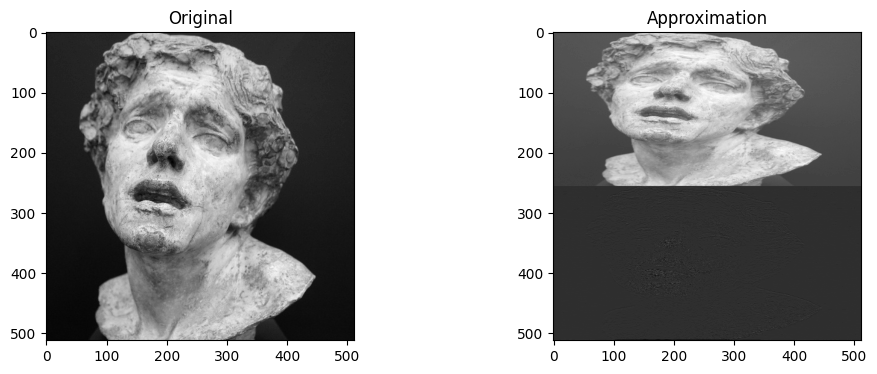

In [90]:
h0 = 1
h1 = 2
h2 = 3
h3 = 4

h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

g0 = h3
g1 = -h2
g2 = h1
g3 = -h0

    

def daubechies4_wavelet_transform_2D(image):
    rows, col = image.shape
    aux = 0
    aux2 = 0
    matrix_coeffs = np.zeros((rows,col))

    for i in range(rows//2):
        if (aux == (rows - 3) or (aux < (rows - 3))):
            matrix_coeffs[i][aux] = h0
            matrix_coeffs[i][aux+1] = h1
            matrix_coeffs[i][aux+2] = h2
            matrix_coeffs[i][aux+3] = h3
            aux = aux + 2
        else:
            matrix_coeffs[i][aux] = h0
            matrix_coeffs[i][aux+1] = h1
            matrix_coeffs[i][aux2] = h2
            matrix_coeffs[i][aux2+1] = h3
            aux2 = aux2 + 2
    aux = 0
    aux2 = 0
    rows_half = rows//2
    for i in range(rows//2):
        if (aux == (rows - 3) or (aux < (rows - 3))):
            matrix_coeffs[i+rows_half][aux] = g0
            matrix_coeffs[i+rows_half][aux+1] = g1
            matrix_coeffs[i+rows_half][aux+2] = g2
            matrix_coeffs[i+rows_half][aux+3] = g3
            aux = aux + 2
        else:
            matrix_coeffs[i+rows_half][aux] = g0
            matrix_coeffs[i+rows_half][aux+1] = g1
            matrix_coeffs[i+rows_half][aux2] = g2
            matrix_coeffs[i+rows_half][aux2+1] = g3
            aux2 = aux2 + 2
    print(matrix_coeffs)
    new_image = np.dot(matrix_coeffs,image)

    return new_image

def downsampling(matrix):
    approx = matrix[:matrix.shape[0]//2, :matrix.shape[1]//2]
    detail = matrix[matrix.shape[0]//2:, :matrix.shape[1]//2]
    return approx, detail


matrix = np.array([[255, 7, 3, 18, 13, 17, 14, 8],
                   [11, 19, 10, 12, 15, 16, 9, 6],
                   [23, 4, 2, 20, 21, 22, 5, 1],
                   [29, 31, 27, 30, 28, 26, 25, 24],
                   [45, 37, 39, 34, 35, 33, 36, 38],
                   [41, 43, 46, 42, 44, 40, 47, 32],
                   [49, 54, 53, 52, 50, 51, 48, 55],
                   [63, 59, 61, 60, 58, 56, 57, 62]])

matrix = np.random.randint(0, 51, (16, 16))
# Apply the wavelet transform
new_image = daubechies4_wavelet_transform_2D(pixels)

approx, detail = downsampling(new_image)

# Plot the approximation and detail images
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(pixels, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(new_image, cmap='gray')
axs[1].set_title('Approximation')
# axs[2].imshow(detail, cmap='gray')
# axs[2].set_title('Approximation')


plt.show()


In [83]:
import numpy as np

def downsampling(matrix):
    approx = matrix[:matrix.shape[0]//2, :matrix.shape[1]//2]
    detail = matrix[matrix.shape[0]//2:, :matrix.shape[1]//2]
    return approx, detail

# Ejemplo de matriz que representa el resultado del filtrado
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16],
                   [17, 18, 19, 20],
                   [21, 22, 23, 24]])

# Aplicar el downsampling a la matriz
approximation, detail = downsampling(matrix)

# Imprimir los resultados
print("Aproximación:")
print(approximation)
print()
print("Detalles:")
print(detail)


Aproximación:
[[ 1  2]
 [ 5  6]
 [ 9 10]]

Detalles:
[[13 14]
 [17 18]
 [21 22]]
